## Notas sobre la práctica

###Se realizaron todos los puntos solicitados, el resultado de cada celda este en el notebook. Incluso algunos mensajes de error o falta de recursos recibos durante el proceso, que en otro momento funcionaron bien.



*   El primer ejercicio se realizo hasta obtener las metricas en MLflow. Se incluyen en el notebook las imagenes solicitadas

*   Para el segundo ejercicio, se creo el pipeline preprecess-local.gpc.py tomando como base el preprocess.py visto en case. Este nuevo pipeline lee el archivos json en lugar del archivo csv y ejecuta el preprocesado tanto en local como en gcp dependiendo del agumento runner. Los archivos se guardan en un [repositorio](https://github.com/danrool/twitter-sentiment-batch/) distinto del repositorio de este notebook, en una de las celdas se recuperan para la ejecucion en Colab.

###Algunas de las ejecuciones se interrumpieron luego de iniciadas para evitar generar problemas con la plataforma.

# Práctica Final: Clasificación de Documentos con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación de documentos. El objetivo es construir un modelo capaz de clasificar automáticamente documentos en categorías predefinidas.

Pasos a seguir:

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [ ]:
! pip install scikit-learn mlflow nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packa

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Cargo el conjunto de datos
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Visualizar estadísticas basicas
print(f"Número de documentos de entrenamiento: {len(newsgroups_train.data)}")
print(f"Número de documentos de prueba: {len(newsgroups_test.data)}")
print(f"Categorías: {newsgroups_train.target_names}")


Número de documentos de entrenamiento: 2257
Número de documentos de prueba: 1502
Categorías: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [ ]:
#Procesamiento de texto

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

y_train = newsgroups_train.target
y_test = newsgroups_test.target


In [ ]:
# Entrenamiento del modelo

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, precision_recall_fscore_support

model = MultinomialNB()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
print(classification_report(y_test, y_pred, target_names=newsgroups_train.target_names))


                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



In [ ]:
 # Registro de metricas con MLFlow

import mlflow
import mlflow.sklearn

mlflow.set_experiment('clasificacion_documentos')

with mlflow.start_run():
    mlflow.sklearn.log_model(model, "model")
    mlflow.log_params({"model_type": "MultinomialNB"})
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    mlflow.log_metrics({"precision": precision, "recall": recall, "f1_score": f1_score})

    # IMAGENESSS !!


In [ ]:
!pip install mlflow

In [ ]:
# Instalar ngrok
!pip install pyngrok

In [ ]:
!ngrok authtoken 'YOUR TOKEN'

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Configurar y exponer puerto
from pyngrok import ngrok

# Termina cualquier túnel ngrok si existe
ngrok.kill()

# Establece el túnel ngrok para el puerto 5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print('MLflow UI running at:', ngrok_tunnel.public_url)


MLflow UI running at: https://1f6e-34-91-64-49.ngrok-free.app


####Capturas de MLFlow!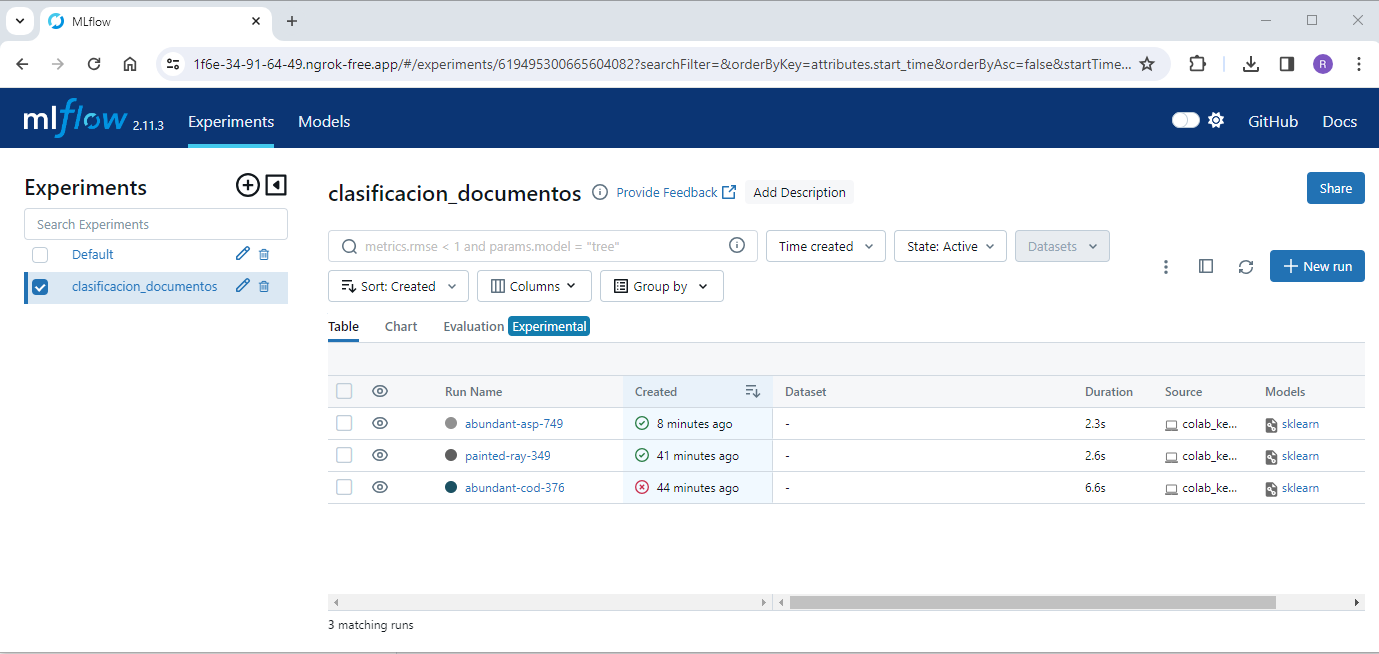

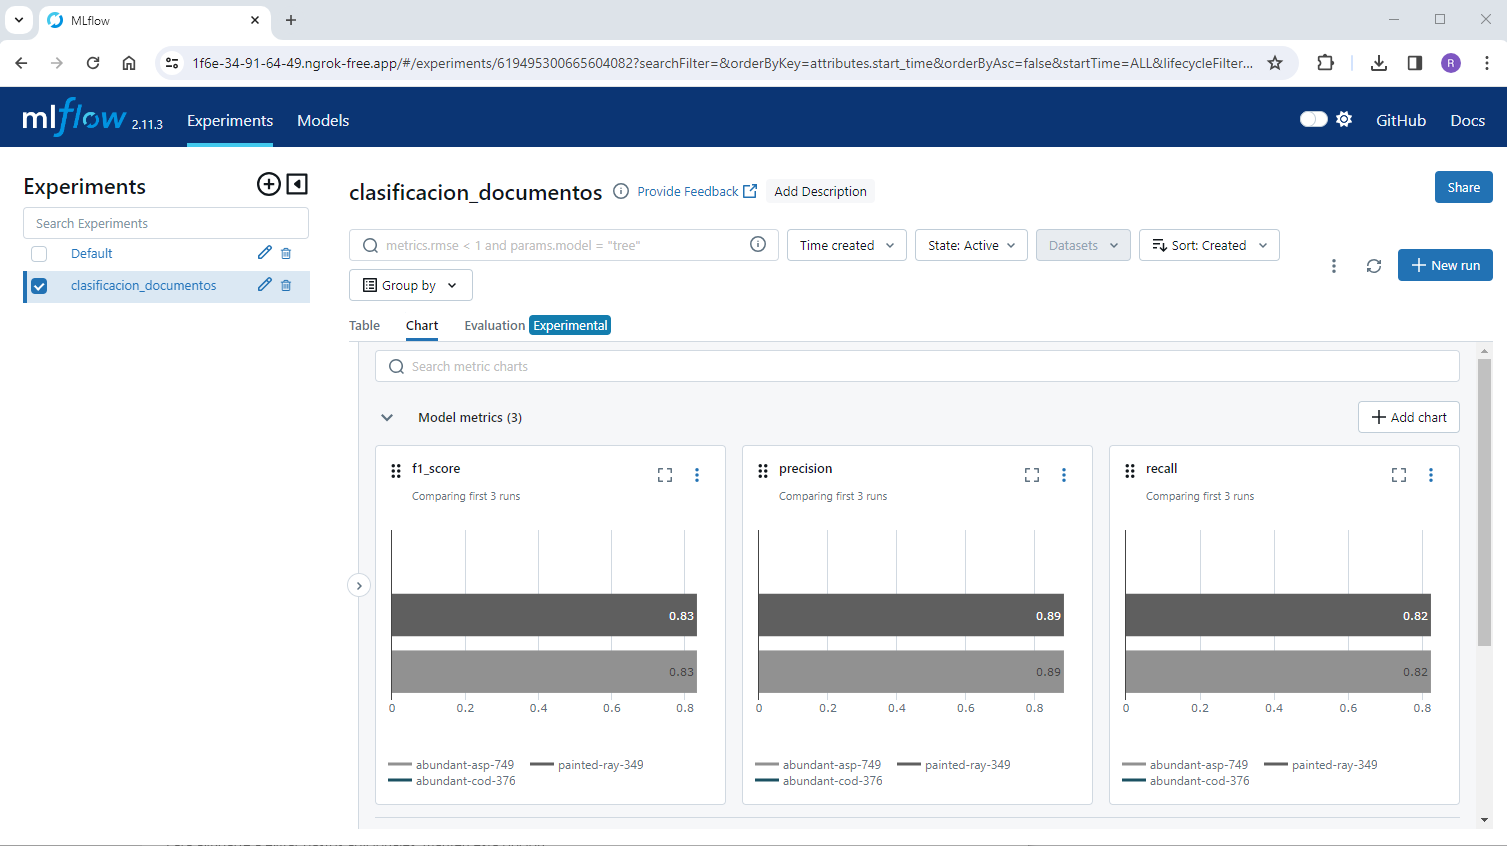

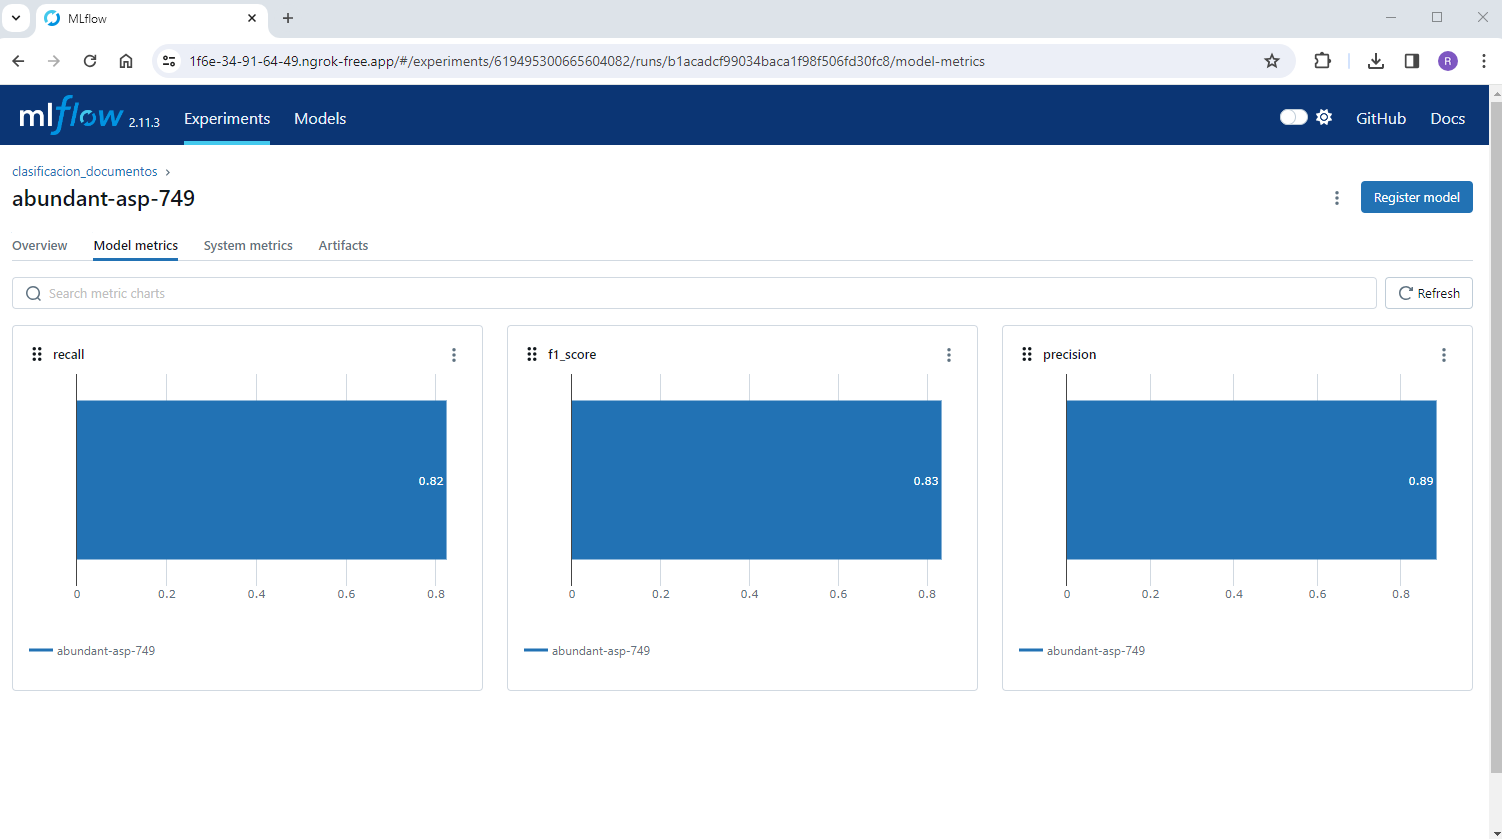

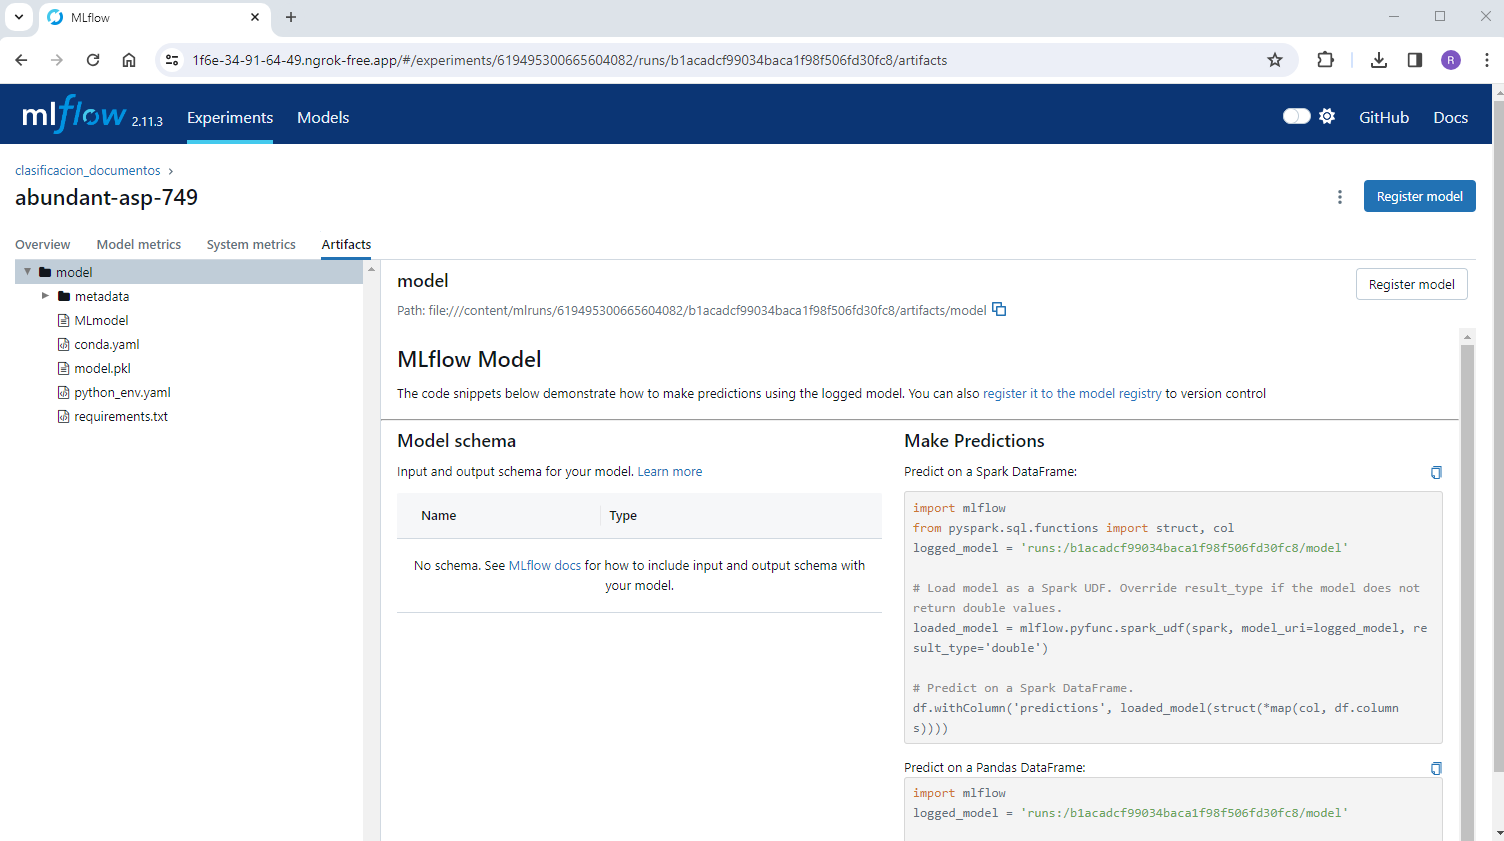

# Práctica Final: detección de mensajes troll



En los últimos años Twitch se ha consolidad como uno de los principales medios de comunicación especialmente para las generaciones más jóvenes.

Al tratarse de una plataforma participativa en la que los usuarios pueden poner comentarios durante y posteriormente a las emisiones. Entre estos comentarios han aparecido como siempre comentarios ofensisvos.

En esta práctica construiremos una Inteligencia Artificial capaz de clasificar esos mensajes troll.

Durante la práctica entrenaremos el modelo de Deep Learning y lo desplegaremos para inferencia en batch, la más habitual actualmente dentro de la industria:

## Teoría

**1. ¿Qué es Apache Beam?**

Apache Beam es un framework de trabajo que permite definir pipelines de procesado de datos enfocadas a la paralelización de procesos.

Beam es una abstracción por lo que los detalles de implementación son gestionados por los motores de ejecución (Flink, DataFlow...)

Es un framework compatible con distintos lenguajes de programación como Java, Python o Go.

**2. ¿Cuáles son las diferentes formas de desplegar un modelo?**

Distinguimos cuatro opciones:

* Despligue en Batch. Desplegamos el modelo para hacer predicciones de grandes cantidades de datos en un momento puntual.

* Despligue online. Permite la disponibilización del modelo a demanda por el ususario de manera que se pueden realizar predicciones mediante llamdas a APIs.

* Despliegue en streaming Despligue pensando en la recepción continua de datos de manera que nuestro servidor es capaz de procesar un flujo continuo e ininterrumpido de datos en tiempo real.

* ML Automatizado. Es el estado más avanzado en el desarrollo de MLOPS en el que el modelo es monitoeado y reentrenado de manera automática.

**3. ¿Cuál es la principal diferencia entre la inferencia en batch y la inferencia en streaming?**

La inferencia en batch procesa grandes cantidades de datos en momentos puntuales y normalmente programados de antemano frente al procesamiento en streming cuya infrastructura está diseñada para estar constantemente en funcionamiento emitiendo predicciones de manera continua y en tiempo real (o casi).



# Configuración de nuestro proyecto en GCP


In [1]:
PROJECT_ID = 'ia-practica-0402'
!gcloud config set project $PROJECT_ID

Updated property [core/project].


In [1]:
import sys

# If you are running this notebook in Colab, run this cell and follow the
# instructions to authenticate your GCP account. This provides access to your
# Cloud Storage bucket and lets you submit training jobs and prediction
# requests.

if 'google.colab' in sys.modules:
  from google.colab import auth as google_auth
  google_auth.authenticate_user()

# If you are running this notebook locally, replace the string below with the
# path to your service account key and run this cell to authenticate your GCP
# account.
else:
  %env GOOGLE_APPLICATION_CREDENTIALS ''

Creamos el bucket mediante la consola y una vez creado lo indicamos en la variable:

In [3]:
BUCKET_NAME = 'ia-practica-0402'
REGION = "europe-west1"

In [4]:
! gsutil mb -l $REGION gs://$BUCKET_NAME

Creating gs://ia-practica-0402/...
ServiceException: 409 A Cloud Storage bucket named 'ia-practica-0402' already exists. Try another name. Bucket names must be globally unique across all Google Cloud projects, including those outside of your organization.


In [5]:
! gsutil ls -al gs://$BUCKET_NAME

                                 gs://ia-practica-0402/twitter-sentiment-batch/


# Entrenamiento e inferencia en Batch

## Preparación

Para esta primera parte se va a utilizar [Tweets Dataset for Detection of Cyber-Trolls](https://www.kaggle.com/dataturks/dataset-for-detection-of-cybertrolls). El objetivo es desarrollar un clasificador binario para detectar si el mensaje recibido es troll (1) o no (0). **Las métricas obtenidas del entrenamiento y la inferencia no se tendrán en cuenta para la evaluación de la práctica, la importancia está en la arquitectura de la solución**, es decir, lo importante no es que nuestro modelo detecte correctamente los tweets de trolls si no que funcione y sea capaz de hacer inferencias.


A continuación, se van a subir los datos de entrenamiento al bucket del proyecto que se haya creado. **Importante:** crea el bucket en una única región. Os dejo disponibilizado el dataset en un bucket de acceso público:

In [2]:
%pip install gdown
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"

Downloading...
From: https://drive.google.com/uc?id=1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr
To: /content/dataset-cybertrolls.json
100% 2.76M/2.76M [00:00<00:00, 58.8MB/s]


Ahora se crea el directorio dónde vas a desarrollar esta primera parte de la práctica.

In [3]:
# Clono el directorio con los pipes, incluye los pipes siministrados y los
# y los modificados para conteplar el dataset con datos json y la ejecucion
# en nube y en local (colab)

! git clone https://github.com/danrool/twitter-sentiment-batch

Cloning into 'twitter-sentiment-batch'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 18 (delta 4), reused 18 (delta 4), pack-reused 0
Receiving objects: 100% (18/18), 6.64 MiB | 2.13 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (13/13), done.


In [4]:
# Creo los directorios necesarios y copio el dataset

! mkdir -p mkdir ./twitter-sentiment-batch/data && cp /content/dataset-cybertrolls.json ./twitter-sentiment-batch/data/dataset-cybertrolls.json

In [5]:
# Verifico los datos

! ls

dataset-cybertrolls.json  mkdir  sample_data  twitter-sentiment-batch


Se establece el directorio de trabajo que hemos creado.

In [6]:
# Estableco el directorio de trabajo

%cd twitter-sentiment-batch/

/content/twitter-sentiment-batch


Ahora se descargarán los datos en el workspace de Colab para trabajar en local.

In [7]:
# Verifico los archivos y datos

! ls && ls ./data

data	    predict-work.py	     preprocess.py	 README.md	   setup.py	  trainer
predict.py  preprocess-local-gcp.py  preprocess-work.py  requirements.txt  tokenizer.pkl
dataset-cybertrolls.json


Se establecen las dependencias que se usarán en la práctica. Se pueden añadir y quitar las dependencias que no se usen o viceversa.

In [8]:
%%writefile requirements.txt

apache-beam[gcp]
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0

Overwriting requirements.txt


Instalamos las dependencias. **No olvides reiniciar el entorno al instalar y establecer las variables y credenciales de GCP al arrancar.**

In [9]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 45.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 5.0 MB/s eta 0:00:00
  Preparing met

In [11]:
PROJECT_ID = "ia-practica-0402" #@param {type:"string"}
! gcloud config set project $PROJECT_ID
BUCKET_NAME = "ia-practica-0402" #@param {type:"string"}
REGION = "europe-west1" #@param {type:"string"}

print(f"Project: {PROJECT_ID}")
print(f"Region: {REGION}")
print(f"Bucket: {BUCKET_NAME}")


Updated property [core/project].
Project: ia-practica-0402
Region: europe-west1
Bucket: ia-practica-0402


In [10]:
! pip install apache-beam[gcp]

  Using cached apache_beam-2.55.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.8 MB)
  Using cached crcmod-1.7-cp310-cp310-linux_x86_64.whl
  Using cached orjson-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (144 kB)
  Using cached dill-0.3.1.1-py3-none-any.whl
  Using cached fastavro-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached fasteners-0.19-py3-none-any.whl (18 kB)
  Using cached hdfs-2.7.3-py3-none-any.whl
  Using cached Js2Py-0.74-py3-none-any.whl (1.0 MB)
  Using cached objsize-0.7.0-py3-none-any.whl (11 kB)
  Using cached pymongo-4.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (676 kB)
  Using cached zstandard-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
  Using cached google_apitools-0.5.31-py3-none-any.whl
  Using cached google_cloud_pubsub-2.21.1-py2.py3-none-any.whl (273 kB)
  Using cached google_cloud_pubsublite-1.9.0-py2.py3-none-any.whl (287 kB)

## Primer ejercicio

Desarrollar un pipeline de preprocesamiento utilizando Apache Beam para generar datos de train, eval y test para los datos proporcionados anteriormente. Requisitos:

- Proporcionar dos modos de ejecución: `train` y `test`
- Soportar ejecuciones en local con `DirectRunner` y ejecuciones en Dataflow usando `DataFlowRunner`.

In [11]:
import os

WORK_DIR = os.getcwd()

In [12]:
WORK_DIR

'/content/twitter-sentiment-batch'

In [13]:
# Preprocesamiento local para train

! python3 preprocess-local-gcp.py \
  --work-dir $WORK_DIR \
  --runner DirectRunner \
  --input $WORK_DIR/data/dataset-cybertrolls.json \
  --output $WORK_DIR/data/transformed_data \
  --mode train

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
INFO:root:Missing pipeline option (runner). Executing pipeline using the default runner: DirectRunner.
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function annotate_downstream_side_inputs at 0x7e2ec46ab910> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function fix_side_input_pcoll_coders at 0x7e2ec46aba30> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function pack_combiners at 0x7e2ec46abf40> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function lift_combiners at 0x7e2ec46ac040> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_sdf at 0x7e2ec46ac1f0> ====================
INFO:apach

In [14]:
# Preprocesamiento los carch local para test

! python3 preprocess-local-gcp.py \
  --work-dir $WORK_DIR \
  --runner DirectRunner \
  --input $WORK_DIR/data/dataset-cybertrolls.json \
  --output $WORK_DIR/data/transformed_data \
  --mode test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:root:Missing pipeline option (runner). Executing pipeline using the default runner: DirectRunner.
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function annotate_downstream_side_inputs at 0x7af1019c2950> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function fix_side_input_pcoll_coders at 0x7af1019c2a70> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function pack_combiners at 0x7af1019c2f80> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function lift_combiners at 0x7af1019c3010> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_sdf at 0x7af1019c31c0> ====================
IN

In [19]:
# En varias ejecuciones se perdia la conexion con GCP por lo que necesitaba
# volver a ejecutar a establecer la conexion

from google.colab import auth
auth.authenticate_user()

In [20]:
# Copiar los archivos locales a GCP

!gsutil -m cp -r ./*.txt gs://$BUCKET_NAME/twitter-sentiment-batch/
!gsutil -m cp -r ./*.py gs://$BUCKET_NAME/twitter-sentiment-batch/

Copying file://./requirements.txt [Content-Type=text/plain]...
-
Operation completed over 1 objects/84.0 B.                                       
Copying file://./predict-work.py [Content-Type=text/x-python]...
Copying file://./predict.py [Content-Type=text/x-python]...
Copying file://./preprocess-local-gcp.py [Content-Type=text/x-python]...
Copying file://./preprocess.py [Content-Type=text/x-python]...
Copying file://./preprocess-work.py [Content-Type=text/x-python]...
Copying file://./setup.py [Content-Type=text/x-python]...
\ [6/6 files][ 32.3 KiB/ 32.3 KiB] 100% Done                                    
Operation completed over 6 objects/32.3 KiB.                                     


In [21]:
# Copiar los archivos locales a GCP

!gsutil -m cp -r ./trainer/ gs://$BUCKET_NAME/twitter-sentiment-batch/trainer

Copying file://./trainer/.DS_Store [Content-Type=application/octet-stream]...
Copying file://./trainer/__init__.py [Content-Type=text/x-python]...
Copying file://./trainer/task-work.py [Content-Type=text/x-python]...
Copying file://./trainer/task.py [Content-Type=text/x-python]...
- [4/4 files][ 22.8 KiB/ 22.8 KiB] 100% Done                                    
Operation completed over 4 objects/22.8 KiB.                                     


In [22]:
# Copiar los archivos locales a GCP

!gsutil -m cp -r ./data gs://$BUCKET_NAME/twitter-sentiment-batch/data

Copying file://./data/transformed_data/train/part-00001-of-00002 [Content-Type=application/octet-stream]...
Copying file://./data/dataset-cybertrolls.json [Content-Type=application/json]...
Copying file://./data/transformed_data/train/part-00000-of-00002 [Content-Type=application/octet-stream]...
Copying file://./data/transformed_data/test/part-00001-of-00002 [Content-Type=application/octet-stream]...
Copying file://./data/transformed_data/eval/part-00001-of-00002 [Content-Type=application/octet-stream]...
Copying file://./data/transformed_data/eval/part-00000-of-00002 [Content-Type=application/octet-stream]...
Copying file://./data/transformed_data/test/part-00000-of-00002 [Content-Type=application/octet-stream]...
| [7/7 files][  5.0 MiB/  5.0 MiB] 100% Done                                    
Operation completed over 7 objects/5.0 MiB.                                      


In [23]:
# Chequeo los archivos en GCP

! gsutil ls -al gs://$BUCKET_NAME
! gsutil ls -al gs://$BUCKET_NAME/twitter-sentiment-batch
! gsutil ls -al gs://$BUCKET_NAME/twitter-sentiment-batch/data

                                 gs://ia-practica-0402/twitter-sentiment-batch/
      5711  2024-04-07T00:32:23Z  gs://ia-practica-0402/twitter-sentiment-batch/predict-work.py#1712449943455730  metageneration=1
      5024  2024-04-07T00:32:23Z  gs://ia-practica-0402/twitter-sentiment-batch/predict.py#1712449943591825  metageneration=1
      8011  2024-04-07T00:32:23Z  gs://ia-practica-0402/twitter-sentiment-batch/preprocess-local-gcp.py#1712449943344685  metageneration=1
      7874  2024-04-07T00:32:23Z  gs://ia-practica-0402/twitter-sentiment-batch/preprocess-work.py#1712449943834805  metageneration=1
      6020  2024-04-07T00:32:23Z  gs://ia-practica-0402/twitter-sentiment-batch/preprocess.py#1712449943690253  metageneration=1
        84  2024-04-07T00:32:20Z  gs://ia-practica-0402/twitter-sentiment-batch/requirements.txt#1712449940526819  metageneration=1
       450  2024-04-07T00:32:24Z  gs://ia-practica-0402/twitter-sentiment-batch/setup.py#1712449944022017  metageneration=1
     

In [24]:
# Estableco el directorio de trabajo en GCP

WORK_DIR_GCP = 'twitter-sentiment-batch'

In [36]:
# Visualizao para verificar las variables que usare en las proximas ejecuciones

print(f"Project: {PROJECT_ID}")
print(f"Region: {REGION}")
print(f"Bucket: {BUCKET_NAME}")
print(f"Directorio : {WORK_DIR}")
print(f"Directorio GCP: {WORK_DIR_GCP}")

Project: ia-practica-0402
Region: europe-west1
Bucket: ia-practica-0402
Directorio : /content/twitter-sentiment-batch
Directorio GCP: twitter-sentiment-batch


Se proporciona un fichero `setup.py` necesario para ejecutar en DataFlow. Modificar la variable `REQUIRED_PACKAGES` con las dependencias que se hayan usado en el `requirements.txt`

In [15]:
%%writefile setup.py

import setuptools

REQUIRED_PACKAGES = [
  "apache-beam[gcp]==2.24.0",
  "tensorflow==2.8.0",
  "gensim==3.6.0",
  "fsspec==0.8.4",
  "gcsfs==0.7.1",
  "numpy==1.20.0"
]

setuptools.setup(
    name="twitchstreaming",
    version="0.0.1",
    install_requires=REQUIRED_PACKAGES,
    packages=setuptools.find_packages(),
    include_package_data=True,
    description="Troll detection",
)


Overwriting setup.py


In [27]:
## Ejecuto el presamiento en GCP train
## -- Interrumpi la ejecucion por disponibilidad de la plataforma

! python3 preprocess-local-gcp.py \
  --project $PROJECT_ID \
  --region $REGION \
  --runner DataflowRunner \
  --temp_location $BUCKET_NAME/$WORK_DIR_GCP/beam-temp \
  --setup_file ./setup.py \
  --work-dir $BUCKET_NAME/$WORK_DIR_GCP \
  --input gs://$BUCKET_NAME/$WORK_DIR_GCP/data/dataset-cybertrolls.json \
  --output $BUCKET_NAME/$WORK_DIR_GCP/data/transformed_data \
  --mode train

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:apache_beam.internal.gcp.auth:Setting socket default timeout to 60 seconds.
INFO:apache_beam.internal.gcp.auth:socket default timeout is 60.0 seconds.
INFO:google.auth.compute_engine._metadata:Compute Engine Metadata server call to universe/universe_domain returned 404, reason: 
INFO:apache_beam.runners.portability.stager:Executing command: ['/usr/bin/python3', '-m', 'build', '--sdist', '--outdir', '/tmp/tmpni5talto', '.']
INFO:apache_beam.runners.dataflow.dataflow_runner:Pipeline has additional dependencies to be installed in SDK worker container, consider using the SDK container image pre-building workflow to avoid repetitive installations. Learn more on https://cloud.google.com/dataflow/docs/guides/using-custom-containers#prebuild
INFO:root:Using provided Python SDK container image: gcr.io/cloud-dataflow/v1beta3/beam_python3.10_sdk:2.55.0
INFO:root:Python SDK c

In [28]:
## Ejecuto el presamiento en GCP train
## -- Interrumpi la ejecucion por disponibilidad de la plataforma

! python3 preprocess-local-gcp.py \
  --project $PROJECT_ID \
  --region $REGION \
  --runner DataflowRunner \
  --temp_location $BUCKET_NAME/$WORK_DIR_GCP/beam-temp \
  --setup_file ./setup.py \
  --work-dir $BUCKET_NAME/$WORK_DIR_GCP \
  --input gs://$BUCKET_NAME/$WORK_DIR_GCP/data/dataset-cybertrolls.json \
  --output $BUCKET_NAME/$WORK_DIR_GCP/data/transformed_data \
  --mode test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:apache_beam.internal.gcp.auth:Setting socket default timeout to 60 seconds.
INFO:apache_beam.internal.gcp.auth:socket default timeout is 60.0 seconds.
INFO:google.auth.compute_engine._metadata:Compute Engine Metadata server call to universe/universe_domain returned 404, reason: 
INFO:apache_beam.runners.portability.stager:Executing command: ['/usr/bin/python3', '-m', 'build', '--sdist', '--outdir', '/tmp/tmpffoqqvab', '.']
INFO:apache_beam.runners.dataflow.dataflow_runner:Pipeline has additional dependencies to be installed in SDK worker container, consider using the SDK container image pre-building workflow to avoid repetitive installations. Learn more on https://cloud.google.com/dataflow/docs/guides/using-custom-containers#prebuild
INFO:root:Using provided Python SDK container image: gcr.io/cloud-dataflow/v1beta3/beam_python3.10_sdk:2.55.0
INFO:root:Python SDK c

Me creo una copia por si hubiera algún error en el procesamiento (buena práctica):

In [16]:
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"
! gsutil cp dataset-cybertrolls.json //$WORK_DIR/data.json


Downloading...
From: https://drive.google.com/uc?id=1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr
To: /content/twitter-sentiment-batch/dataset-cybertrolls.json
100% 2.76M/2.76M [00:00<00:00, 162MB/s]
Copying file://dataset-cybertrolls.json...
/ [1 files][  2.6 MiB/  2.6 MiB]                                                
Operation completed over 1 objects/2.6 MiB.                                      


### Validación preprocess train en local
Con el comando mostrado a continuación se valida la correcta generación de los datos de entrenamiento y validación en local.

In [17]:
# mostrar los archivos generados para train y validacion
! ls -l  //$WORK_DIR/data/transformed_data/train && ls -l  //$WORK_DIR/data/transformed_data/eval

total 816
-rw-r--r-- 1 root root 315563 Apr  7 03:04 part-00000-of-00002
-rw-r--r-- 1 root root 514032 Apr  7 03:04 part-00001-of-00002
total 212
-rw-r--r-- 1 root root 131894 Apr  7 03:04 part-00000-of-00002
-rw-r--r-- 1 root root  77852 Apr  7 03:04 part-00001-of-00002


In [18]:
! head -n 10  //$WORK_DIR/data/transformed_data/train/part-00000-of-00002

hmm maybe crossed wires w 1 allisoncarter called nerd correct geek moving 2 fast 4 fun, NEGATIVE
agreed continues piss, NEGATIVE
wonder outlook sucks, NEGATIVE
sucks lol cause time fine 1 meal cant none driving nuts lol, NEGATIVE
nice robot post lol gt hate cheesy responses, NEGATIVE
tell wrestlher loser gets clean office, NEGATIVE
hear blip still damn line btw malicious already taken let start band, NEGATIVE
european stop bitch mbites stop buying chocolate bought 22 kilos, NEGATIVE
fuck love barry manilow, NEGATIVE
hate bring um see ur last tweet came, NEGATIVE


In [32]:
!gsutil ls -l  gs://$BUCKET_NAME/$WORK_DIR_GCP/data/transformed_data/train && ls -l  gs://$BUCKET_NAME/$WORK_DIR_GCP/data/transformed_data/eval

    313884  2024-04-06T23:37:45Z  gs://ia-practica-0402/twitter-sentiment-batch/data/transformed_data/train/part-00000-of-00002
    524025  2024-04-06T23:37:45Z  gs://ia-practica-0402/twitter-sentiment-batch/data/transformed_data/train/part-00001-of-00002
TOTAL: 2 objects, 837909 bytes (818.27 KiB)
ls: cannot access 'gs://ia-practica-0402/twitter-sentiment-batch/data/transformed_data/eval': No such file or directory


### Validación preprocess test en local

Con el comando mostrado a continuación se valida la correcta generación de los datos de test en local.

In [19]:
# Mosrtar los datos de test generados

! ls -l  //$WORK_DIR/data/transformed_data/test

total 1388
-rw-r--r-- 1 root root 532561 Apr  7 03:05 part-00000-of-00002
-rw-r--r-- 1 root root 881686 Apr  7 03:05 part-00001-of-00002


In [20]:
! head -n 10  //$WORK_DIR/data/transformed_data/test/part-00000-of-00002

"Hmm  maybe I crossed wires w/1 of you & @allisoncarter. Who called who nerd & was correct as geek? Me moving 2 fast 4 fun."
"agreed. Continues to piss me off too."
"i spent half an hour in that damn maze of roundabouts :-0"
"No wonder Outlook sucks..."
"It's sucks..lol  cause any other time I'd be fine with 1 meal  but because I cant have none  it's driving me nuts..lol"
"Nice robot post!... LOL&gt; I hate those cheesy responses too."
"tell her I will wrestlher and loser gets to clean my office"
"Can't hear that blip  still in this damn line. BTW  if Malicious isn't already taken  let's start a band."
"I know Ripley lives - I don't think the others do. Sucks to be them!"
"you're a European so stop being a bitch to @mbites or I'll stop buying your chocolate  of which  I once bought 22 kilos :)"


## Segundo ejercicio

Desarrollar una tarea de entrenamiento para los datos preprocesados. Requisitos:

- Soportar ejecuciones en local usando el SDK de AI-Platform y ejecuciones en GCP con el mismo código.

Se crea el directorio donde trabajaremos:

In [41]:
%mkdir /content/batch/trainer

mkdir: cannot create directory ‘/content/batch/trainer’: No such file or directory


In [42]:
%%writefile trainer/__init__.py

version = "0.1.0"

Overwriting trainer/__init__.py


In [43]:
print(f"Project: {PROJECT_ID}")
print(f"Region: {REGION}")
print(f"Bucket: {BUCKET_NAME}")
print(f"Directorio : {WORK_DIR}")
print(f"Directorio GCP: {WORK_DIR_GCP}")


Project: ia-practica-0402
Region: europe-west1
Bucket: ia-practica-0402
Directorio : /content/twitter-sentiment-batch
Directorio GCP: twitter-sentiment-batch


In [52]:
JOB = "twitter_sentiment_analysis_batch_$(date +%Y%m%d_%H%M%S)"

JOB_DIR_GCP = "gs://" + BUCKET_NAME + "/" + WORK_DIR_GCP + "/trainer"

In [54]:
# Entrenamiento en GCP
# LA EJECUCION PROBOCABA ESTOS ERRORES
##
## ERROR: (gcloud.ai-platform.jobs.submit.training) RESOURCE_EXHAUSTED: Quota failure for project ia-practica-0402. The request for 1 K80 accelerators exceeds the allowed maximum of 0 A100, 0 K80, 0 P100, 0 P4, 0 T4, 0 TPU_V2, 0 TPU_V2_POD, 0 TPU_V3, 0 TPU_V3_POD, 0 V100 accelerators. To read more about Cloud ML Engine quota, see https://cloud.google.com/ml-engine/quotas.
## - '@type': type.googleapis.com/google.rpc.QuotaFailure
##
! gcloud ai-platform jobs submit training $JOB \
  --module-name trainer.task \
  --package-path trainer \
  --scale-tier basic_gpu \
  --python-version 3.7 \
  --runtime-version 2.1 \
  --region $REGION \
  --job-dir $JOB_DIR \
  --stream-logs \
  -- \
  --work-dir $JOB_DIR_GCP \
  --epochs 3

ERROR: (gcloud.ai-platform.jobs.submit.training) RESOURCE_EXHAUSTED: Quota failure for project ia-practica-0402. The request for 1 K80 accelerators exceeds the allowed maximum of 0 A100, 0 K80, 0 P100, 0 P4, 0 T4, 0 TPU_V2, 0 TPU_V2_POD, 0 TPU_V3, 0 TPU_V3_POD, 0 V100 accelerators. To read more about Cloud ML Engine quota, see https://cloud.google.com/ml-engine/quotas.
- '@type': type.googleapis.com/google.rpc.QuotaFailure
  violations:
  - description: The request for 1 K80 accelerators exceeds the allowed maximum of
      0 A100, 0 K80, 0 P100, 0 P4, 0 T4, 0 TPU_V2, 0 TPU_V2_POD, 0 TPU_V3, 0 TPU_V3_POD,
      0 V100 accelerators.
    subject: ia-practica-0402


In [21]:
# Entrenamiento local

# Explicitly tell `gcloud ai-platform local train` to use Python 3
! gcloud config set ml_engine/local_python $(which python3)

# This is similar to `python -m trainer.task --job-dir local-training-output`
# but it better replicates the AI Platform environment, especially for
# distributed training (not applicable here).
! gcloud ai-platform local train \
  --package-path trainer \
  --module-name trainer.task \
  -- \
  --work-dir $WORK_DIR \
  --epochs 1


Updated property [ml_engine/local_python].
2024-04-07 03:13:28.967834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 03:13:28.967908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 03:13:28.969696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 03:13:28.978658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07

### Validación Train en local

Con el comando mostrado a continuación se valida el correcto entrenamiento del modelo usando los datos preprocesados del apartado anterior.

In [41]:
!ls /content/twitter-sentiment-batch/data/model

model.h5  tokenizer.pkl


## Tercer ejercicio

Desarrollar un pipeline de inferencia utilizando Apache Beam para generar predicciones usando los modelos generados en el apartado anterior así como los datos de test generados en el primer ejercicio.


Generamos un timestamp para la ejecución de las predicciones

In [26]:
from datetime import datetime

# current date and time
TIMESTAMP = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

In [27]:
TIMESTAMP

'2024-04-07_05-00-40'

### Validación Predict en local

Con el comando mostrado a continuación se valida la correcta inferencia usando los modelos anteriores y los datos de test generados anteriormente.

In [28]:
! python3 predict.py \
  --work-dir $WORK_DIR \
  --model-dir $WORK_DIR/data/model \
  batch \
  --inputs-dir $WORK_DIR/data/transformed_data/test/part* \
  --outputs-dir $WORK_DIR/predictions/$TIMESTAMP

2024-04-07 05:00:51.035267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 05:00:51.035350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 05:00:51.038110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 05:00:52.668346: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Namespace(work_dir='/content/twitter-sentiment-batch', model_dir='/content/twitter-sentiment-batch/data/model', verb='batch', inputs_dir='/content/twitter-sentiment-batch/data/transformed_data/test/part-00000-of-00002', outputs_dir='/content

# Mensaje final

¡Muchas gracias por participar en este curso, espero que tanto las sesiones teóricas como la práctica te hayan resultado útiles. A lo largo de esta semmana iréis recibiendo feedback personalizado sobre vuestras prácticas.

¡Muchas gracias y ánimo con el proyecto final!